In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('gdrive/My Drive/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

gdrive/My Drive/train/Pori urundai/google_0148.jpg
gdrive/My Drive/train/Pori urundai/google_0003.jpg
gdrive/My Drive/train/Pori urundai/google_0104.jpg
gdrive/My Drive/train/Pori urundai/google_0019.jpg
gdrive/My Drive/train/Pori urundai/google_0048.jpg
gdrive/My Drive/train/Pori urundai/google_0050.jpg
gdrive/My Drive/train/Pori urundai/google_0086.jpg
gdrive/My Drive/train/Pori urundai/google_0083.jpg
gdrive/My Drive/train/Pori urundai/google_0077.jpg
gdrive/My Drive/train/Pori urundai/google_0070.jpg
gdrive/My Drive/train/Pori urundai/google_0065.jpg
gdrive/My Drive/train/Pori urundai/google_0038.jpg
gdrive/My Drive/train/Pori urundai/google_0084.jpg
gdrive/My Drive/train/Pori urundai/google_0080.jpg
gdrive/My Drive/train/Pori urundai/google_0056.jpg
gdrive/My Drive/train/Pori urundai/google_0052.jpg
gdrive/My Drive/train/Pori urundai/google_0012.jpg
gdrive/My Drive/train/Pori urundai/google_0137.png
gdrive/My Drive/train/Pori urundai/google_0085.jpg
gdrive/My Drive/train/Pori urun

In [3]:
!pip install captum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 22.4 MB/s 


<hr style="border: solid 3px blue;">

# Introduction

-----------------------------------------
# Importing library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as TF

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader

from torchvision.utils import make_grid
from torchvision import models as models 
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

from torchvision import models

from captum.attr import IntegratedGradients
from captum.attr import Saliency
from captum.attr import DeepLift
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [6]:
input_dir = 'gdrive/My Drive/'

In [7]:
#check models which are supported
dir(models)

['AlexNet',
 'ConvNeXt',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'VisionTransformer',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'convnext',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 '

# Transforming the Data

In order to perform transfer learning using a pre-trained model, images must be appropriately preprocessed. 224 x 224 images is used as input. Therefore, the input flower image must also be resized to the corresponding size.

In [8]:
# load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

database = datasets.ImageFolder(input_dir+'train', transform=data_transform)
test_size = 500
training_size = len(database) - test_size
train_ds, test_ds = random_split(database, [training_size, test_size])

# print out some data stats
print('Num training images: ', len(train_ds))
print('Num test images: ', len(test_ds))


Num training images:  1909
Num test images:  500


In [9]:
classes = database.classes
print(classes)
n=len(classes)
print(n)

['Adirasam', 'Akkaravadisal', 'Ammini kolukattai', 'Appam', 'Avarakai Poriyal', 'Baby potato fry', 'Beans paruppu usili', 'Beetroot Poriyal', 'Biryani', 'Bonda', 'Boondhi raita', 'Carrot Poriyal', 'Chicken 65', 'Coconut chutney', 'Dosa', 'Egg gravy', 'Ennai kathirikai karakulambu', 'Gulab jamun', 'Halwa', 'Idiyappam', 'Kadalai mittai', 'Kuzhi Paniyaram', 'Lemon rice', 'Methu vadai', 'Mor kulambu', 'Murukku', 'Mutton chukka', 'Paal panniyaram', 'Parotta', 'Paruppu Poli', 'Pori urundai', 'Rasam', 'Ratha poriyal', 'Thenmittai']
34


# Loading Data using DataLoaders

In [10]:
# define dataloader parameters
batch_size = 10
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Visualizing some sample data

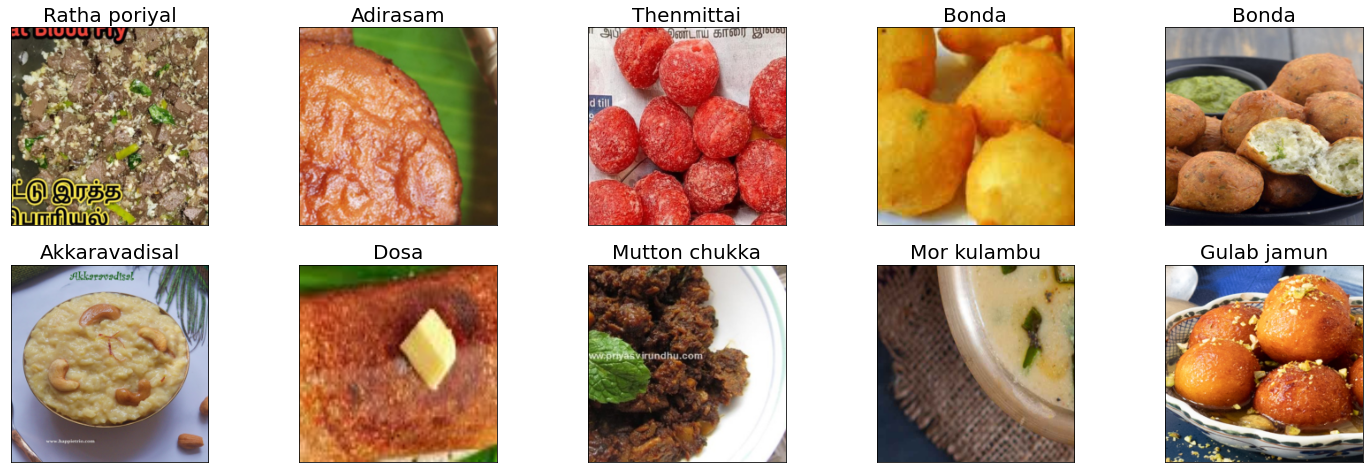

In [11]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 8))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]],fontsize=20)

--------------------------------------------------------------
# Defining the Model

**Create the model in the following order:**

1. Load the pre-trained model.
2. All weight information is "freeze" for use as a fixed feature extractor.
3. The last fully connected layer is deleted.
4. Change the last Classifier to be suitable for classifying flower images.

Freezing the weight means that the weight information in the pre-trained model is not updated during training.

In [12]:
# Load the pretrained model from pytorch
m_v2 = models.mobilenet_v2(pretrained=True)

# print out the model structure
print(m_v2)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [13]:
print(m_v2.classifier[1].in_features) 
print(m_v2.classifier[1].out_features) 

1280
1000


In [14]:
# Freeze training for all "features" layers
for param in m_v2.features.parameters():
    param.requires_grad = False

# Add Final Classifier Layer
If you have set the pre-trained feature extractor, add a fully-connected layer as the last classifier.

In [15]:
import torch.nn as nn

n_inputs = m_v2.classifier[1].in_features

last_layer = nn.Linear(n_inputs, len(classes))

m_v2.classifier[1] = last_layer

# if GPU is available, move the model to GPU
if train_on_gpu:
    m_v2.cuda()

# check that the last layer
print(m_v2.classifier[1].out_features)
print(m_v2)

34
MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-

# Defining Loss Function and Optimizer
We use cross-entropy loss and stochastic gradient descent. Choose the learning rate appropriately.


In [58]:
import torch.optim as optim

# define loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# define optimizer
optimizer = optim.Adam(m_v2.classifier.parameters(), lr=0.02)

# Training

In [56]:
# number of epochs to train the model
n_epochs = 2
device = 'cpu'

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    running_loss = 0.0
    ###################
    # train the model #
    ###################
    # model by default is set to train
    for batch_i, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = m_v2(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        # statistics
        running_loss += loss.item() * data.size(0)
        # scheduler.step()
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

    epoch_loss = running_loss / 1909    # dataset size (Num training images:  1909) or no.of classes
    print(f' Loss: {epoch_loss:.4f} ')

Epoch 1, Batch 20 loss: 15.4475978612899780
Epoch 1, Batch 40 loss: 10.6480886235833161
Epoch 1, Batch 60 loss: 11.1357480257749550
Epoch 1, Batch 80 loss: 11.6531533360481259
Epoch 1, Batch 100 loss: 16.3220631480216980
Epoch 1, Batch 120 loss: 9.0848925173282620
Epoch 1, Batch 140 loss: 8.9306593794317450
Epoch 1, Batch 160 loss: 6.8719177186489109
Epoch 1, Batch 180 loss: 8.4628937843179308
 Loss: 11.1150 
Epoch 2, Batch 40 loss: 8.7490084373777783
Epoch 2, Batch 60 loss: 11.0937624871730804
Epoch 2, Batch 80 loss: 5.7694068908691403
Epoch 2, Batch 100 loss: 13.0721462164772682
Epoch 2, Batch 120 loss: 11.8699211120605472
Epoch 2, Batch 140 loss: 7.2420451283454899
Epoch 2, Batch 160 loss: 10.5730428993701935
Epoch 2, Batch 180 loss: 7.7802543827890478
 Loss: 9.8958 


------------------------------------------------
# Testing

In [67]:
# track test loss 
test_loss = 0.0
class_correct = list(0. for i in range(34))
class_total = list(0. for i in range(34))

m_v2.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = m_v2(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    

    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(34):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %5f (%2d/%2d)' % (
            classes[i], class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %5f (%2d/%2d)' % (
     np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 37.346501

Test Accuracy of Adirasam: 0.882353 (15/17)
Test Accuracy of Akkaravadisal: 0.846154 (11/13)
Test Accuracy of Ammini kolukattai: 0.687500 (11/16)
Test Accuracy of Appam: 1.000000 (14/14)
Test Accuracy of Avarakai Poriyal: 0.833333 (15/18)
Test Accuracy of Baby potato fry: 0.900000 (18/20)
Test Accuracy of Beans paruppu usili: 0.866667 (13/15)
Test Accuracy of Beetroot Poriyal: 0.785714 (11/14)
Test Accuracy of Biryani: 0.909091 (10/11)
Test Accuracy of Bonda: 0.812500 (13/16)
Test Accuracy of Boondhi raita: 1.000000 (10/10)
Test Accuracy of Carrot Poriyal: 0.928571 (13/14)
Test Accuracy of Chicken 65: 0.888889 (16/18)
Test Accuracy of Coconut chutney: 0.916667 (11/12)
Test Accuracy of  Dosa: 0.769231 (10/13)
Test Accuracy of Egg gravy: 0.733333 (11/15)
Test Accuracy of Ennai kathirikai karakulambu: 0.769231 (10/13)
Test Accuracy of Gulab jamun: 0.909091 (10/11)
Test Accuracy of Halwa: 0.692308 ( 9/13)
Test Accuracy of Idiyappam: 1.000000 (11/11)
Test Accuracy of K

In [23]:
nb_classes = 34
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (data, target) in enumerate(test_loader):
        inputs = data.to('cpu')
        classes = target.to('cpu')
        outputs = m_v2(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

In [ ]:
!pip install seaborn

Text(0.5, 69.0, 'Predicted label')

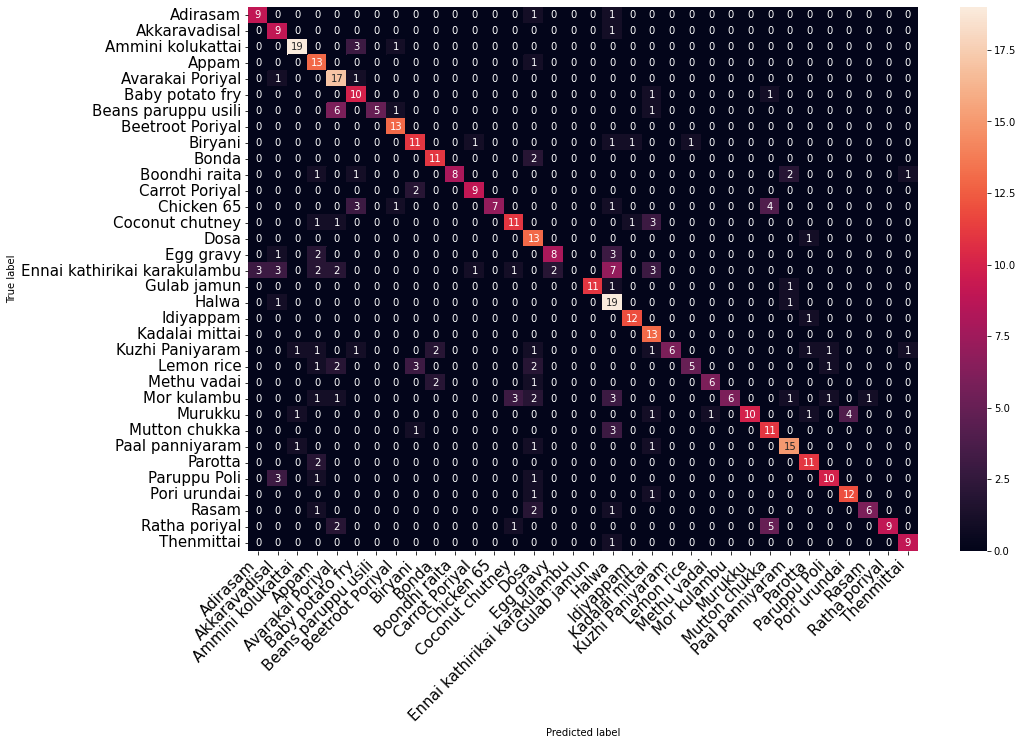

In [25]:
import seaborn as sns
plt.figure(figsize=(15,10))

class_names = database.classes
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [29]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(confusion_matrix)
print(type(confusion_matrix))

[[ 9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 19.  0.  0.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. 17.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  6.  0.  5.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.

In [30]:
from sklearn.metrics import confusion_matrix

nb_classes = 34
device = 'cpu'

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (data, target) in enumerate(test_loader):
        inputs = data.to(device)
        classes = target.to(device)
        outputs = m_v2(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
print(conf_mat)

# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  1  0  0  0  0  0  0]
 [ 0  1 18  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 11  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0

------------------------------------------------------
# Visualizing Sample Test Results

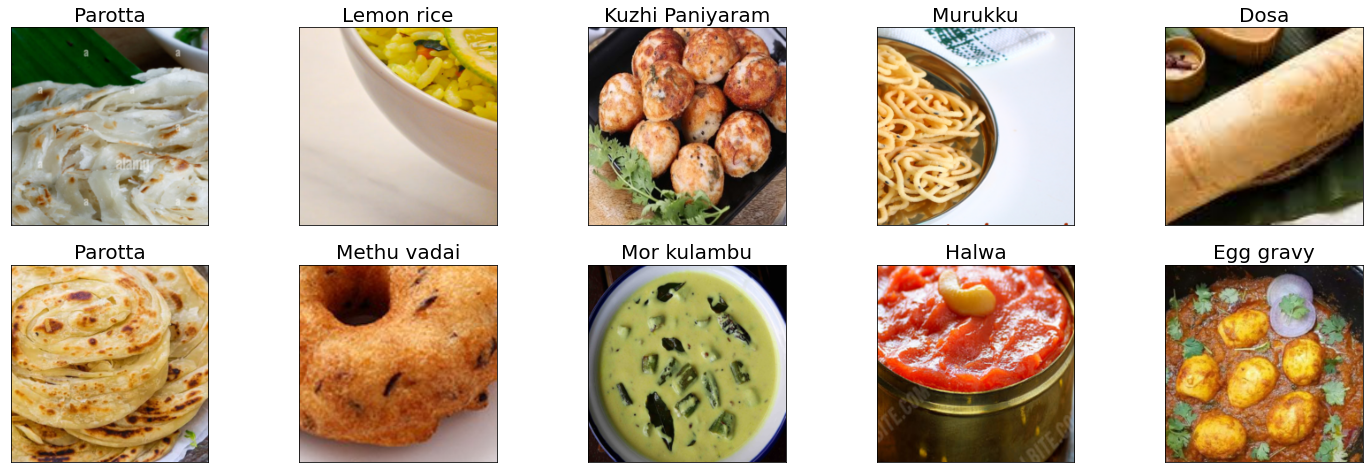

In [35]:
# obtain one batch of training images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images_np = images.numpy() # convert images to numpy for display
classes = database.classes
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 8))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images_np[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]],fontsize=20)